In [7]:
%pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from keras.optimizers import SGD
from IPython.display import display, Image

In [9]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

# Data Description :-

In [10]:
file_path = 'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/data_preparation/data_preparation.csv'
gold_df = pd.read_csv(file_path)
gold_df.head(2)

Date  GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper  crude_oil   
0  2023-11-03     1993.5     2011.9    1989.3      1999.2  3.6815      80.51  \
1  2023-11-02     1992.0     1999.2    1986.3      1993.5  3.6725      82.46   

      DXY  EURUSD    MSCI    NASDAQ    NLR  platinum      RUT  silver   
0  105.02  1.0732  497.76  13478.28  71.36     944.3  1760.71  23.285  \
1  106.12  1.0622  487.02  13294.19  72.14     930.6  1714.21  22.846   

     SP500    VIX  
0  4358.34  14.91  
1  4317.78  15.66

In [11]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3423 non-null   object 
 1   GOLD_open   3423 non-null   float64
 2   GOLD_high   3423 non-null   float64
 3   GOLD_low    3423 non-null   float64
 4   GOLD_close  3423 non-null   float64
 5   copper      3423 non-null   float64
 6   crude_oil   3423 non-null   float64
 7   DXY         3423 non-null   float64
 8   EURUSD      3423 non-null   float64
 9   MSCI        3423 non-null   float64
 10  NASDAQ      3423 non-null   float64
 11  NLR         3423 non-null   float64
 12  platinum    3423 non-null   float64
 13  RUT         3423 non-null   float64
 14  silver      3423 non-null   float64
 15  SP500       3423 non-null   float64
 16  VIX         3423 non-null   float64
dtypes: float64(16), object(1)
memory usage: 454.7+ KB


In [12]:
gold_df.describe().drop(['25%', '50%', '75%']).transpose()

count         mean          std        min         max
GOLD_open   3423.0  1488.210488   267.533166  1051.5000   2076.4000
GOLD_high   3423.0  1498.695998   269.780564  1062.7000   2089.2000
GOLD_low    3423.0  1476.962869   264.782930  1045.4000   2049.0000
GOLD_close  3423.0  1487.994332   267.328340  1049.6000   2069.4000
copper      3423.0     3.247181     0.671831     1.9435      4.9375
crude_oil   3423.0    71.627350    22.241466    11.5700    123.7000
DXY         3423.0    91.413742     9.025438    72.9300    114.1000
EURUSD      3423.0     1.195920     0.112538     0.9596      1.4831
MSCI        3423.0   189.348583   186.302973    25.5900    675.1500
NASDAQ      3423.0  6943.137756  3890.770421  2091.7900  16057.4400
NLR         3423.0    51.782723     7.312556    34.0800     82.3500
platinum    3423.0  1168.948729   308.315804   596.8000   1905.7000
RUT         3423.0  1351.911145   446.438337   590.0300   2442.7400
silver      3423.0    21.649980     6.323651    11.7720     48.5990
SP500       3423.0  2537.427067  1047.150201  1022.5800   4796.5600
VIX         3423.0    18.594940     7.184007     9.1400     82.6900

In [13]:
##Checking Missing Values
gold_df.isnull().sum()

Date          0
GOLD_open     0
GOLD_high     0
GOLD_low      0
GOLD_close    0
copper        0
crude_oil     0
DXY           0
EURUSD        0
MSCI          0
NASDAQ        0
NLR           0
platinum      0
RUT           0
silver        0
SP500         0
VIX           0
dtype: int64

In [14]:
##Converting Date column as DateTime format
gold_df['Date'] = pd.to_datetime(gold_df['Date'],format='%Y-%m-%d')

In [15]:
gold_df.dtypes

Date          datetime64[ns]
GOLD_open            float64
GOLD_high            float64
GOLD_low             float64
GOLD_close           float64
copper               float64
crude_oil            float64
DXY                  float64
EURUSD               float64
MSCI                 float64
NASDAQ               float64
NLR                  float64
platinum             float64
RUT                  float64
silver               float64
SP500                float64
VIX                  float64
dtype: object

In [16]:
##Setting Date as Index
gold_df.set_index('Date',inplace=True)

In [17]:
gold_df.head(2)

GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper  crude_oil   
Date                                                                        
2023-11-03     1993.5     2011.9    1989.3      1999.2  3.6815      80.51  \
2023-11-02     1992.0     1999.2    1986.3      1993.5  3.6725      82.46   

               DXY  EURUSD    MSCI    NASDAQ    NLR  platinum      RUT   
Date                                                                     
2023-11-03  105.02  1.0732  497.76  13478.28  71.36     944.3  1760.71  \
2023-11-02  106.12  1.0622  487.02  13294.19  72.14     930.6  1714.21   

            silver    SP500    VIX  
Date                                
2023-11-03  23.285  4358.34  14.91  
2023-11-02  22.846  4317.78  15.66

# Exploratory Data Analysis(EDA)

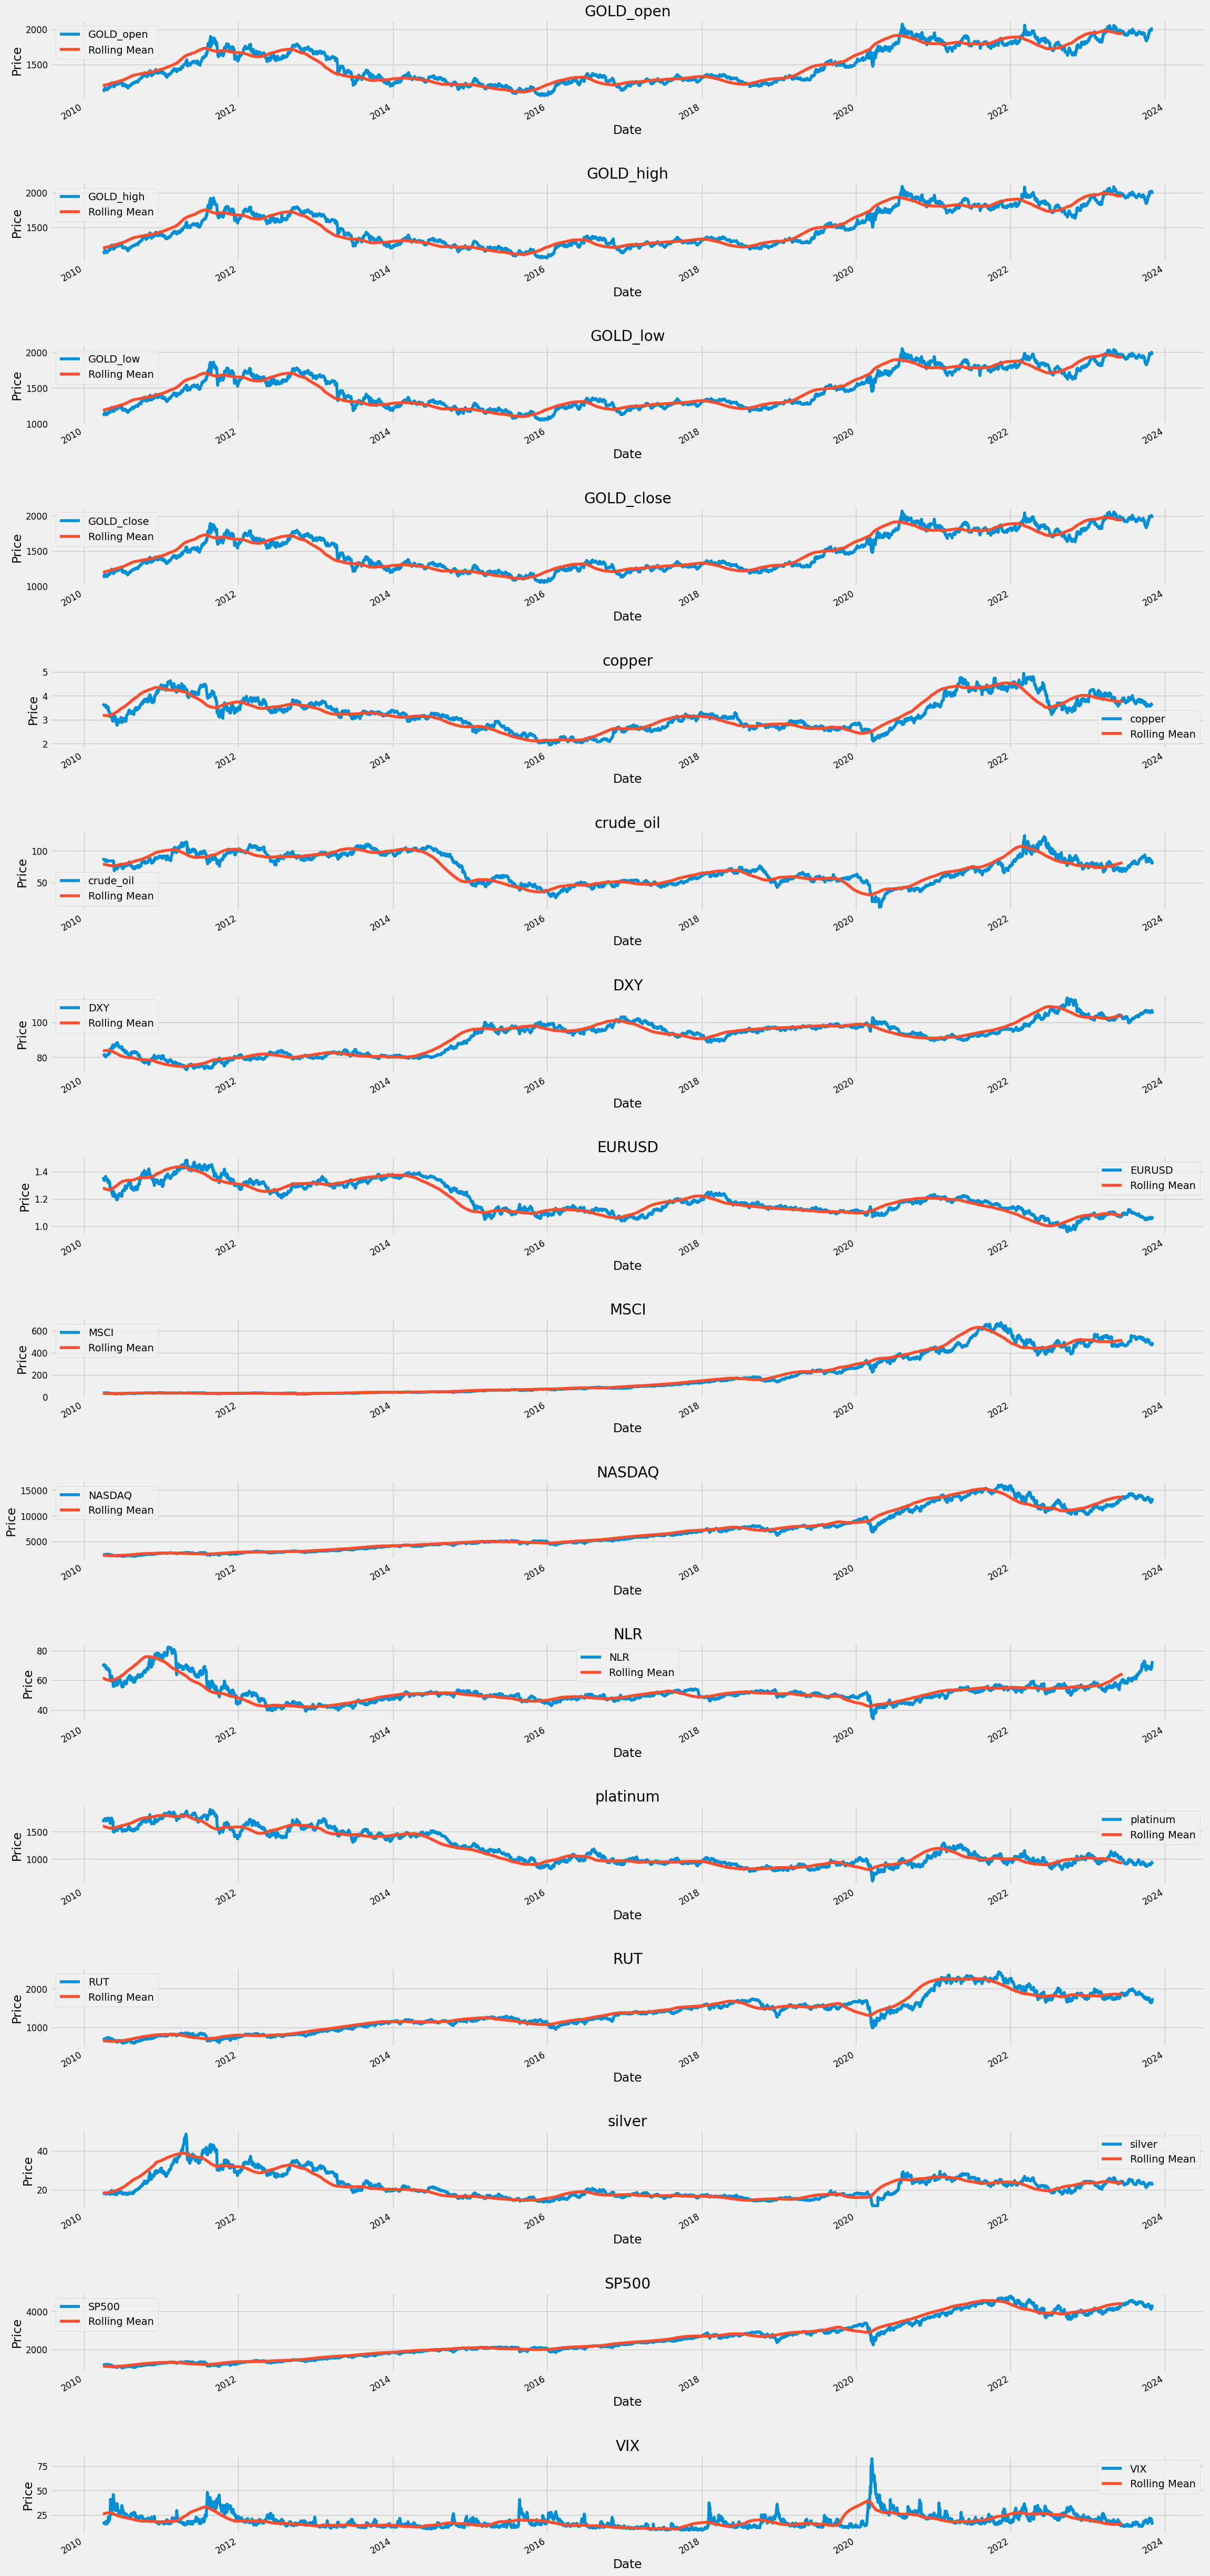

In [20]:
##Line Plots Target & Features
data = gold_df
col_names = data.columns

fig = plt.figure(figsize=(24, 50))
plt.style.use('fivethirtyeight')
for i in range(16):
  ax = fig.add_subplot(16,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()
     


/var/folders/k9/xss4jl9s24sg7_7zhcmrp2g00000gn/T/ipykernel_6279/2540602472.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
/var/folders/k9/xss4jl9s24sg7_7zhcmrp2g00000gn/T/ipykernel_6279/2540602472.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
htt

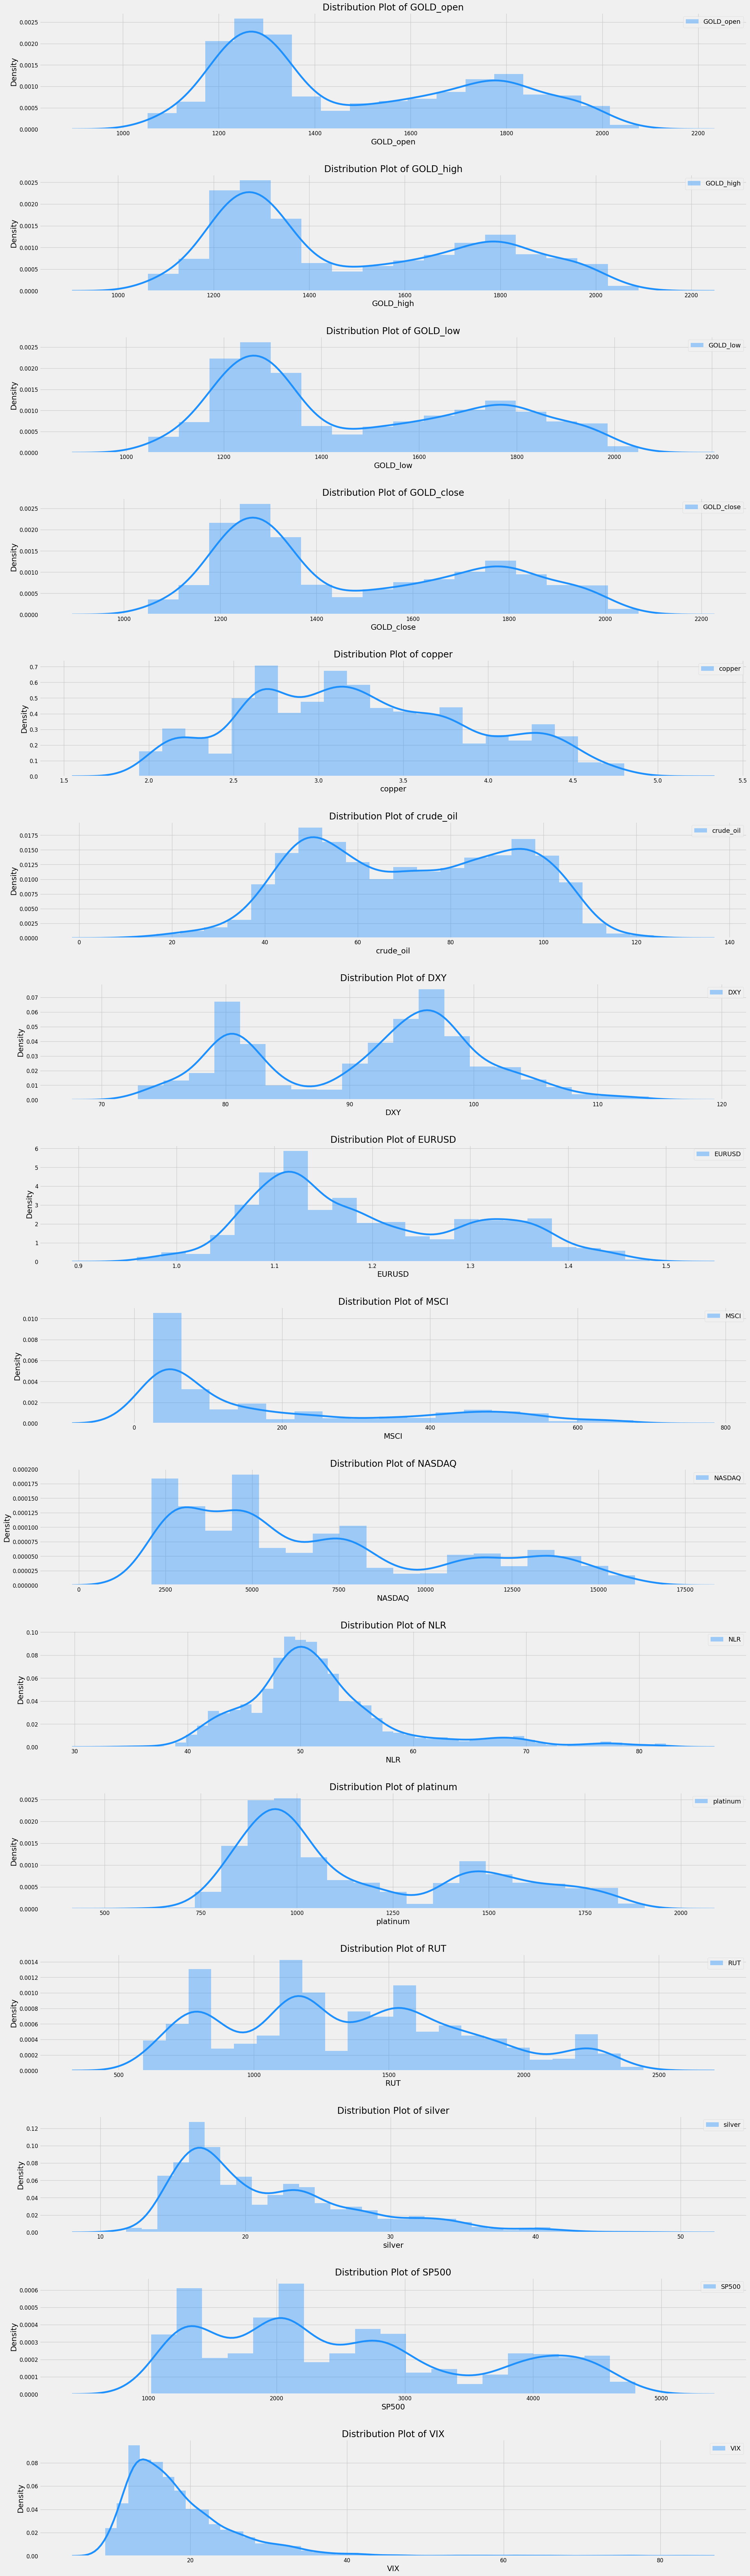

In [22]:
##Checking if Target and Features follow Normal Distribution
data = gold_df
fig = plt.figure(figsize=(24, 80))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(16):
  ax = fig.add_subplot(16,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

From above Distribution plots :-

-> Most frequent values of GOLD are in the range of 1200 to 1400.

-> The GOLD price values above 2000 are less frequent.

-> All Features & GOLD don't follow Normal Distribution.

In [23]:
## Temporary DataFrame
temp_data = gold_df
temp_data['Year'] = gold_df.index.year

Text(0.5, 1.0, 'Box Plot Year Wise-GOLD')

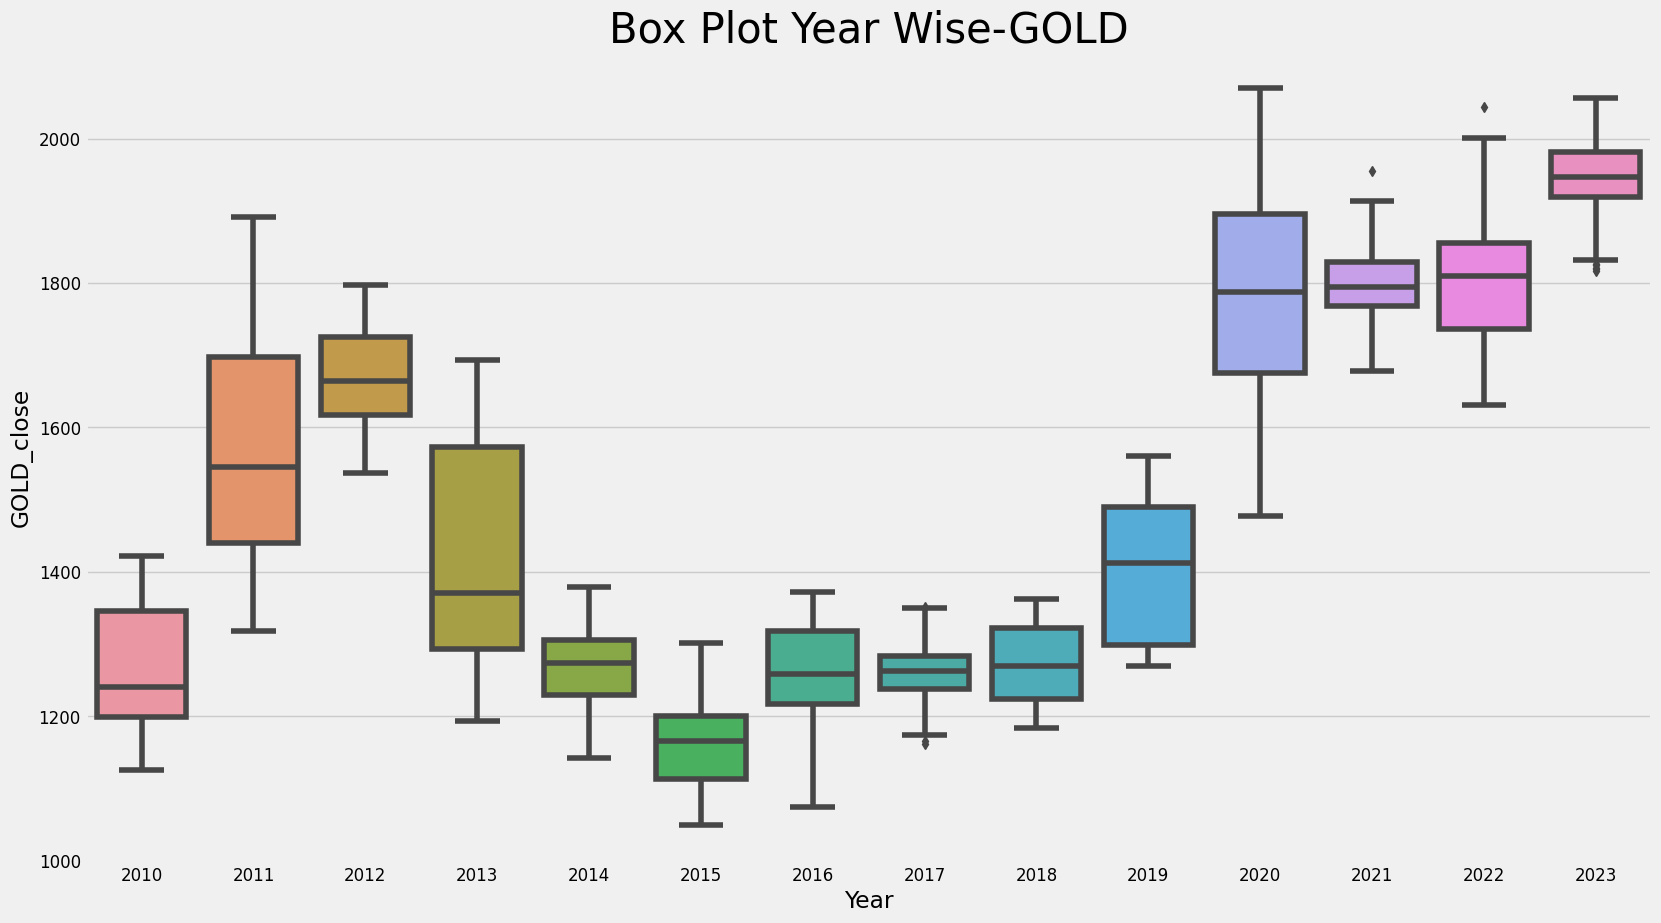

In [24]:
##Box Plot Year Wise WTI
plt.figure(figsize=(18,10))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['GOLD_close'])
ax.set_title('Box Plot Year Wise-GOLD',fontsize=30)

-> Years 2017, 2021 and 2022 show some outliers.

/var/folders/k9/xss4jl9s24sg7_7zhcmrp2g00000gn/T/ipykernel_6279/2812950034.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(240 + i)


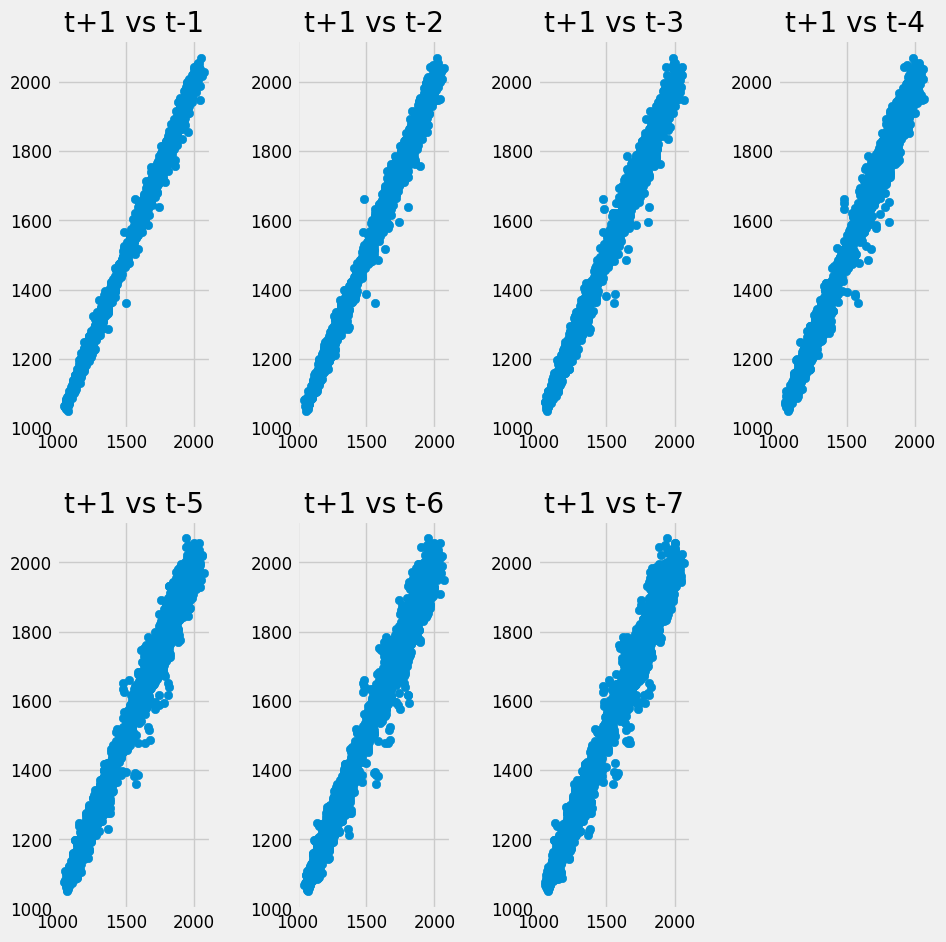

In [25]:
##Checking Series Lag Relationship(Auto-Correlation Nature)
plt.figure(figsize=(10,10))
pd.plotting.lag_plot(gold_df['GOLD_close'])
wti_series = gold_df['GOLD_close']
n_lags = 7
cols = [wti_series]

for i in range(1,(n_lags + 1)):
	cols.append(wti_series.shift(i))
df = pd.concat(cols, axis=1)
cols = ['t+1']
for i in range(1,(n_lags + 1)):
	cols.append('t-' + str(i))
df.columns = cols
plt.figure(1)
for i in range(1,(n_lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.tight_layout(pad=2)
plt.show()

-> The above Lag plot indicates that GOLD has good positive correlation with each of its lagging orders.

-> This kind of series is good for time series as its showing auto-regressive nature.

## Bivariate Analysis (GOLD and Features)

In [26]:
gold_df.drop(labels=['Year'],axis=1,inplace=True)

In [27]:
##Scaling Data to Observe Bivariate Analysis 
sc = MinMaxScaler(feature_range=(0,1))
gold_df_scaled= sc.fit_transform(gold_df)

Since distribution is not normal we use Standardisation instead of Normalization.

In [28]:
##Scaled Data Glimse
gold_df_scaled[:2]

array([[0.91911406, 0.92469557, 0.94051415, 0.93116297, 0.58049432,
        0.61482208, 0.77945106, 0.21700096, 0.72690745, 0.81532116,
        0.77232235, 0.26549011, 0.63187439, 0.31262389, 0.88388386,
        0.07845003],
       [0.9176505 , 0.91232343, 0.93752491, 0.92557364, 0.57748831,
        0.63221261, 0.80616954, 0.19598854, 0.71037318, 0.80213954,
        0.78848146, 0.2550233 , 0.60677602, 0.30070329, 0.87313658,
        0.08864718]])

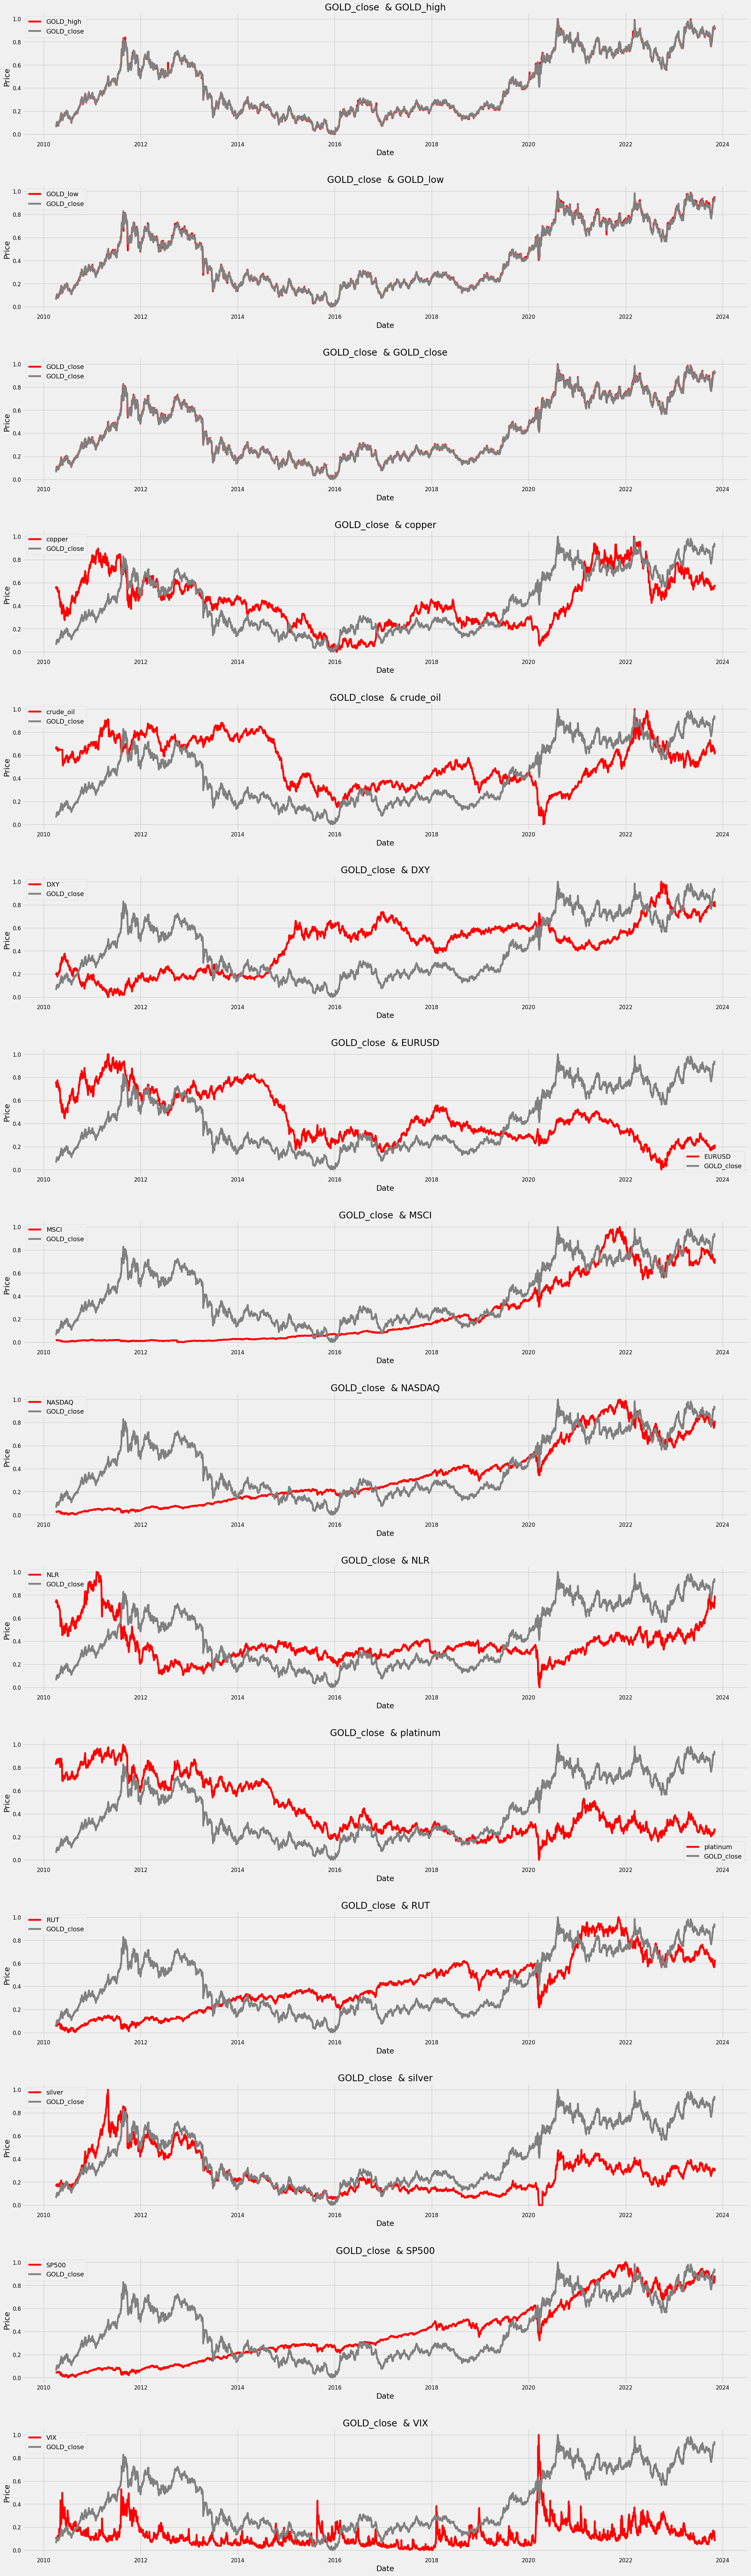

In [32]:
##Comparing Movement of WTI wrt to Features
col_names = data.columns[1:]
scaled_features = gold_df_scaled[:,1:]
fig = plt.figure(figsize=(24, 80))
plt.style.use('fivethirtyeight')
for i in range(15):
  ax = fig.add_subplot(15,1,i+1)
  ax.plot(gold_df.index,scaled_features[:,i],label=col_names[i],c='red')
  ax.plot(gold_df.index,gold_df_scaled[:,0],label='GOLD_close',c='grey')
  ax.set_title('GOLD_close  & ' + col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

Inferences From Bivariate Feature Analysis :-
....

## Multivariate Analysis

In [33]:
import plotly.express as px


gold_df_reset = gold_df.reset_index(drop=True)

fig = px.parallel_coordinates(
    gold_df_reset,
    color='GOLD_close',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Co-ordinates Plot'
)

fig.show()


- Inferences From Parallel Co-ordinates Plot :-
...
- Since Target & Feature don't follow normal distribution , we will use Spearman Correlation.

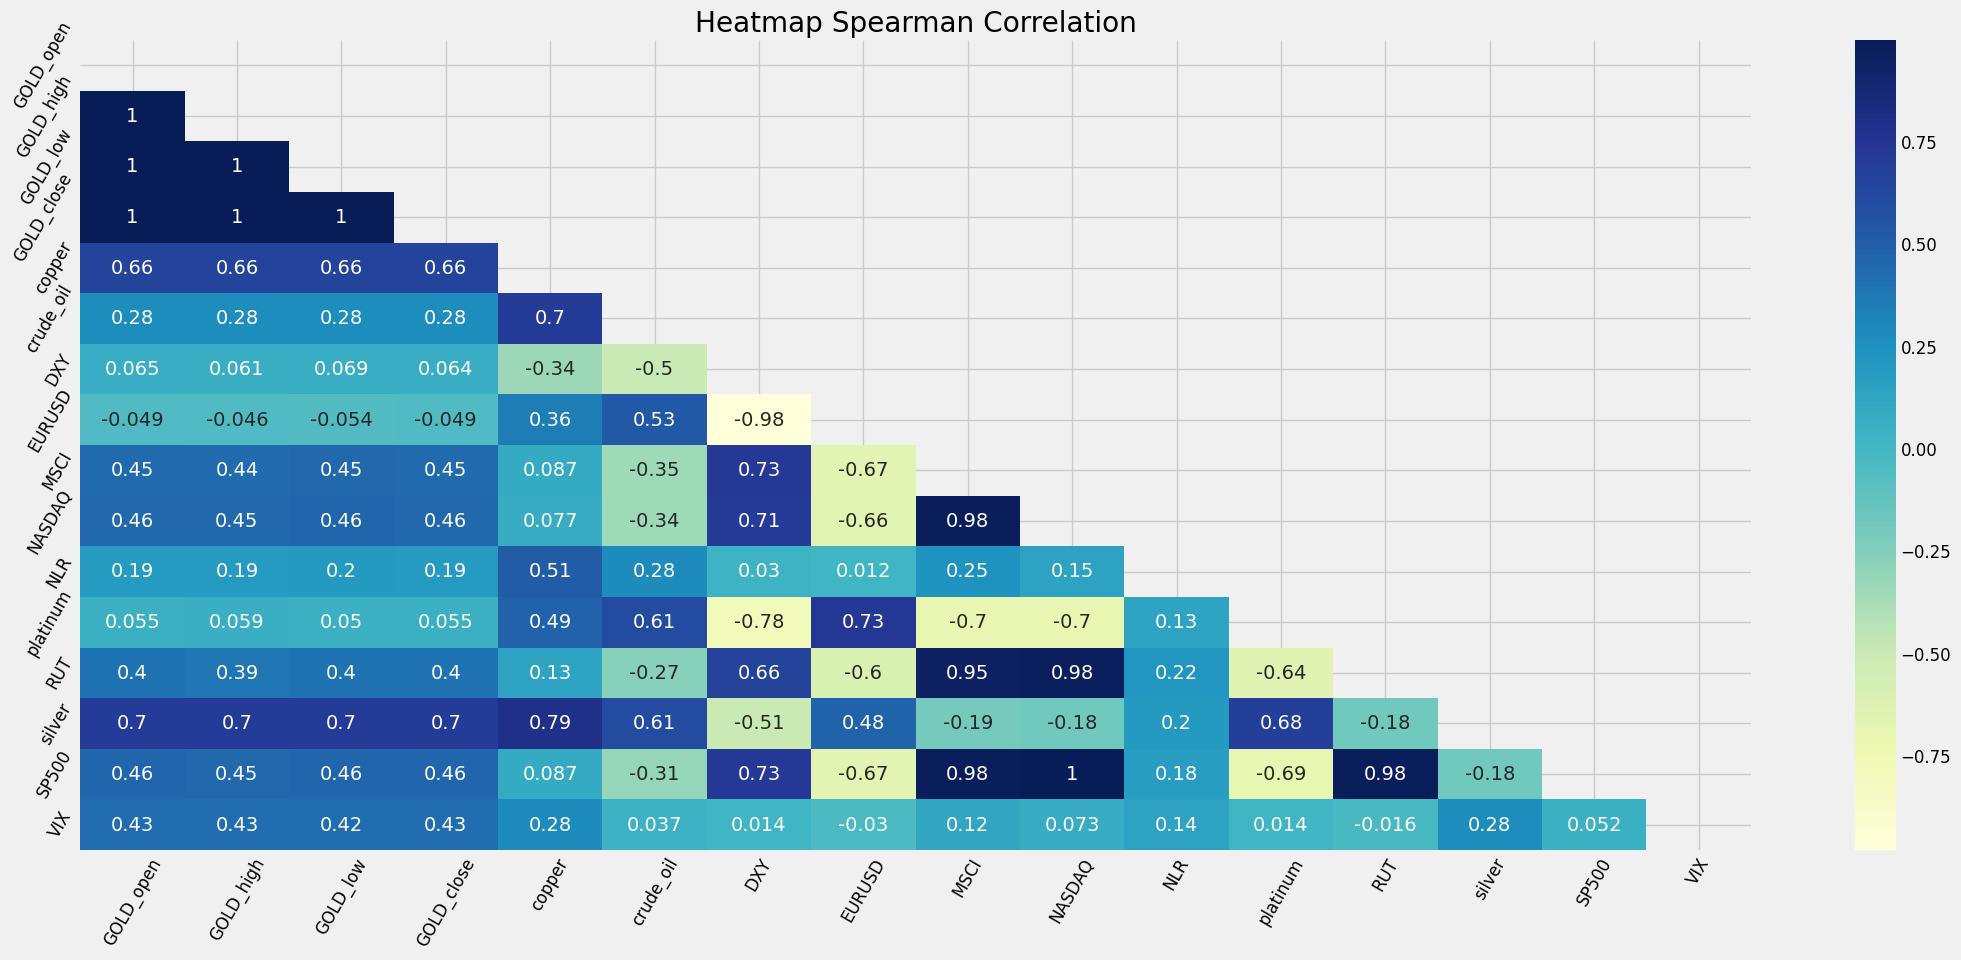

In [35]:
##HeatMap Spearman Correlation
plt.figure(figsize=(24,10))
matrix = np.triu(gold_df.corr(method='spearman'))
heat_map = sns.heatmap(gold_df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

- > The highest positive correlation with target variable GOLD_close is with silver (ρ:0.7) 
- > We also observe that FED and GOLD_close have less correlation.(ρ : 0.073)
- > EURUSD and GOLD_close are moderately inversely correlated.(ρ : -0.056)
- > MSCI, NASDAQ, RUT, SP500, VIX & GOLD_close positive moderate correlation.(ρ : 0.4 - 0.5 )







## Feature Selection
We eliminate features by Filteration technique and use correlation factor . 
- >We eliminate all features having spearman correlation less than magnitude of 0.4.


In [37]:
##Feature Selection
after_fs = gold_df[['GOLD_close','GOLD_high', 'GOLD_low', 'GOLD_open', 'copper', 'MSCI', 'NASDAQ', 'RUT', 'silver', 'SP500', 'VIX']]
after_fs.head(3)

GOLD_close  GOLD_high  GOLD_low  GOLD_open  copper    MSCI   
Date                                                                     
2023-11-03      1999.2     2011.9    1989.3     1993.5  3.6815  497.76  \
2023-11-02      1993.5     1999.2    1986.3     1992.0  3.6725  487.02   
2023-11-01      1987.5     2005.9    1978.2     1993.3  3.6490  471.85   

              NASDAQ      RUT  silver    SP500    VIX  
Date                                                   
2023-11-03  13478.28  1760.71  23.285  4358.34  14.91  
2023-11-02  13294.19  1714.21  22.846  4317.78  15.66  
2023-11-01  13061.47  1669.70  22.790  4237.86  16.87